In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv(r'I:\Text Datasets\CSV\uber_drives2016.csv')

In [35]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Cleaning the Dataset 

In [36]:
df.columns=df.columns.str.replace('*','')

In [37]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [43]:
df['START_DATE']=pd.to_datetime(df.START_DATE)
df['END_DATE']=pd.to_datetime(df.END_DATE)
#When i execute this script this error genrated so i have to remove Totals 
#which cause me error for this 
# ValueError: ('Unknown string format:', 'Totals')

In [39]:
# Replacing with a dummy date wich is not exist so we can deal it 
df['START_DATE']=df.START_DATE.str.replace('Totals','2/2/2222')
df['END_DATE']=df.END_DATE.str.replace('Totals','2/2/2222')

In [41]:
df['START_DATE']=pd.to_datetime(df.START_DATE)
df['END_DATE']=pd.to_datetime(df.END_DATE)

In [105]:
df['PURPOSE']=df.PURPOSE.replace(np.NaN,'UNKNOWN')

In [106]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


### How much take a single travel  time 

In [54]:
#Getting how much get the travel days
df['DAYS']=df.END_DATE.dt.day-df.END_DATE.dt.day

In [100]:
df.DAYS.max()

In [56]:
#All the travels done within a day so no need to add days in dataset
df.drop('DAYS',axis=1,inplace=True)

In [83]:
df['HOURS']=df.END_DATE-df.START_DATE

In [90]:
df.HOURS=pd.to_datetime(df.MINUTES)

In [103]:
df['MINUTES']=df.HOURS.dt.minute+df.HOURS.dt.hour*60
df.drop('HOURS',axis=1,inplace=True)

In [107]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


### Which Category is More Used for Drives

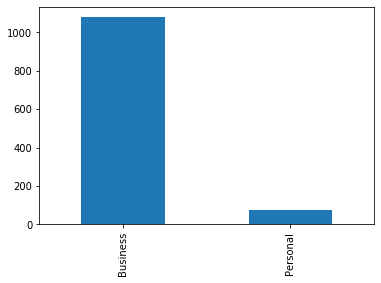

In [110]:
df.CATEGORY.value_counts().plot(kind='bar')

### Which Category is More Used for Long Drives  
 - Seprating Buisness and Personal Drive with Miles
 - Iterating a loop for geting real values and append into a list

In [169]:
bsns_x=df[df.CATEGORY=='Business'].groupby('CATEGORY').MILES.value_counts().values
bsns_y=df[df.CATEGORY=='Business'].groupby('CATEGORY').MILES.value_counts().index

prsn_x=df[df.CATEGORY=='Personal'].groupby('CATEGORY').MILES.value_counts().values
prsn_y=df[df.CATEGORY=='Personal'].groupby('CATEGORY').MILES.value_counts().index

In [173]:
miles_b=[bsns_y[s][1] for s in range(len(bsns_y))]
miles_p=[prsn_y[s][1] for s in range(len(prsn_y))]

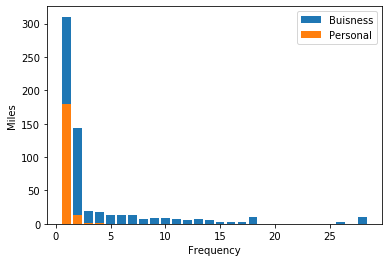

In [182]:
plt.bar(bsns_x,miles_b,label='Buisness')
plt.bar(prsn_x,miles_p,label='Personal')
plt.xlabel('Frequency')
plt.ylabel('Miles')
plt.legend()
plt.show()

In [183]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


### Locations Where More People traveld

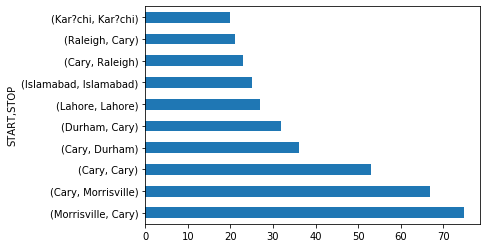

In [214]:
df[(df.START!='Unknown Location') & (df.STOP!='Unknown Location')].groupby(['START','STOP']).size().sort_values().nlargest(10).plot(kind='barh')

### Which Drives used more time with Location and Miles
 - these are top 10 drives with distance where more people traveld

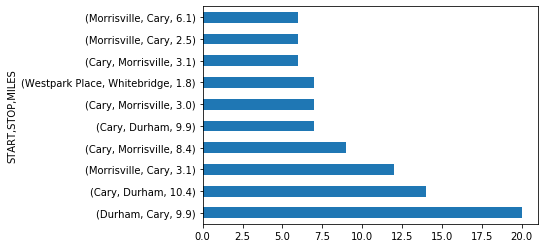

In [213]:
df.groupby(['START','STOP']).MILES.value_counts().nlargest(10).plot(kind='barh')

### Drives location which take more time 
- These are top 10 drives which take more time

In [274]:
df.sort_values('MINUTES',inplace=True)

In [285]:
new_df=df[df.START!='Unknown Location'].tail(11).dropna()

In [292]:
new_df.loc[:,['START','STOP','MINUTES']]

,START,STOP,MINUTES
295,Kissimmee,Daytona Beach,146.0
779,Islamabad,Islamabad,161.0
270,Jacksonville,Kissimmee,165.0
1088,Rawalpindi,Unknown Location,166.0
268,Cary,Latta,178.0
297,Jacksonville,Ridgeland,178.0
881,Asheville,Mebane,181.0
559,Boone,Cary,185.0
546,Morrisville,Banner Elk,206.0
269,Latta,Jacksonville,330.0


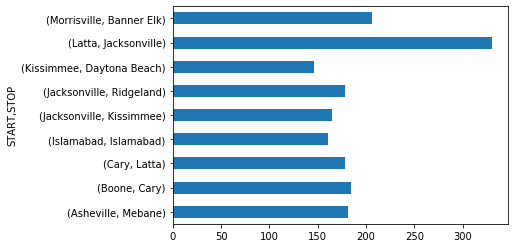

In [304]:
new_df[(new_df.START!='Unknown Location') & (new_df.STOP!='Unknown Location')].groupby(['START','STOP']).MINUTES.sum().plot(kind='barh')

### Why More People Used UBER ? 
 - This question about which purpose of people make more usable to Uber

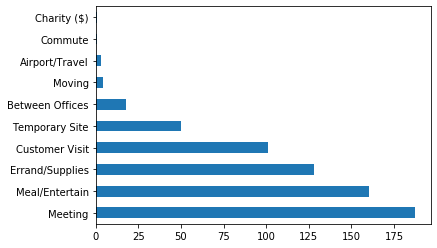

In [309]:
df[df.PURPOSE!='UNKNOWN'].PURPOSE.value_counts().plot(kind='barh')